In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
# Step 1: Load datasets
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

In [4]:
# Step 2: Clean column names
trader_df.columns = trader_df.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()

In [5]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['sentiment_class'] = sentiment_df['classification'].map({
    'Fear': 0,
    'Extreme Fear': 0,
    'Greed': 1,
    'Extreme Greed': 1
})
sentiment_df.rename(columns={'date': 'Date'}, inplace=True)

In [6]:
trader_df['timestamp_ist'] = pd.to_datetime(trader_df['timestamp_ist'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df.dropna(subset=['timestamp_ist'], inplace=True)
trader_df['Date'] = pd.to_datetime(trader_df['timestamp_ist'].dt.date)

In [7]:
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'sentiment_class']], on='Date', how='inner')

In [8]:
print(merged_df[['account', 'Date', 'side', 'closed_pnl', 'sentiment_class']].head())

                                      account       Date side  closed_pnl  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02  BUY         0.0   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02  BUY         0.0   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02  BUY         0.0   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02  BUY         0.0   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed 2024-12-02  BUY         0.0   

   sentiment_class  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0  


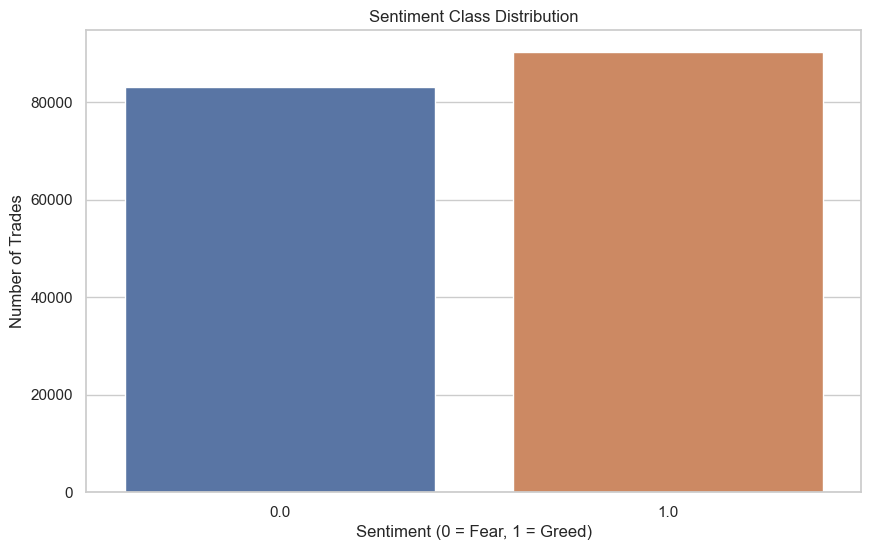

In [9]:
#Sentiment distribution
sns.countplot(x='sentiment_class', data=merged_df)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment (0 = Fear, 1 = Greed)")
plt.ylabel("Number of Trades")
plt.show()

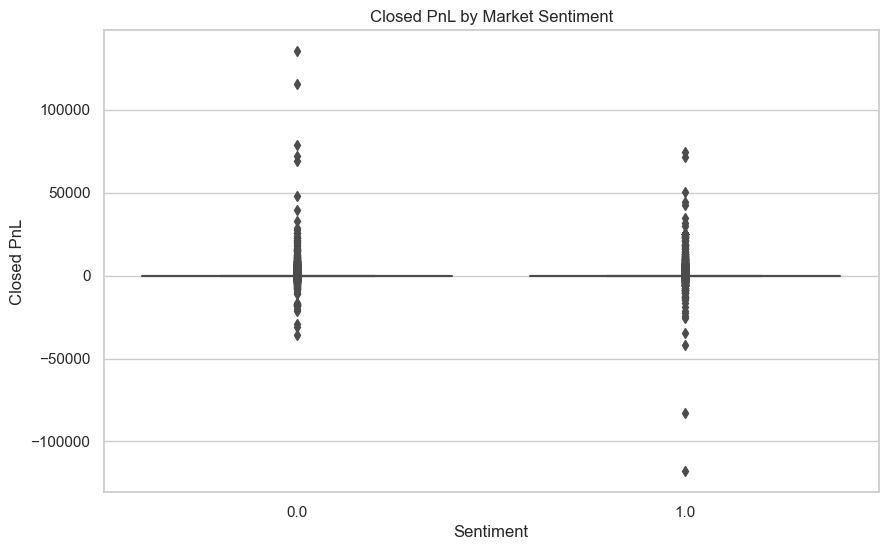

In [10]:
#Closed PnL by Sentiment
sns.boxplot(x='sentiment_class', y='closed_pnl', data=merged_df)
plt.title("Closed PnL by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Closed PnL")
plt.show()

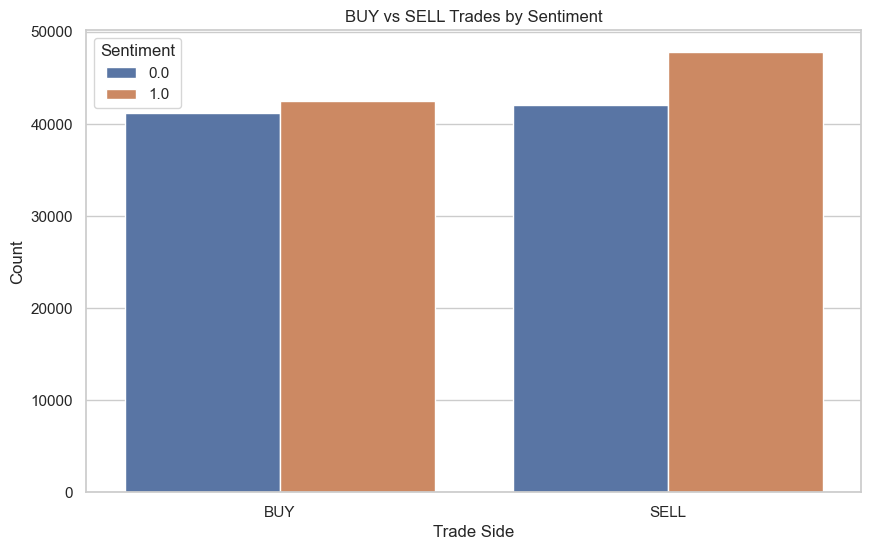

In [11]:
#Trade Side Preference by Sentiment
sns.countplot(x='side', hue='sentiment_class', data=merged_df)
plt.title("BUY vs SELL Trades by Sentiment")
plt.xlabel("Trade Side")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

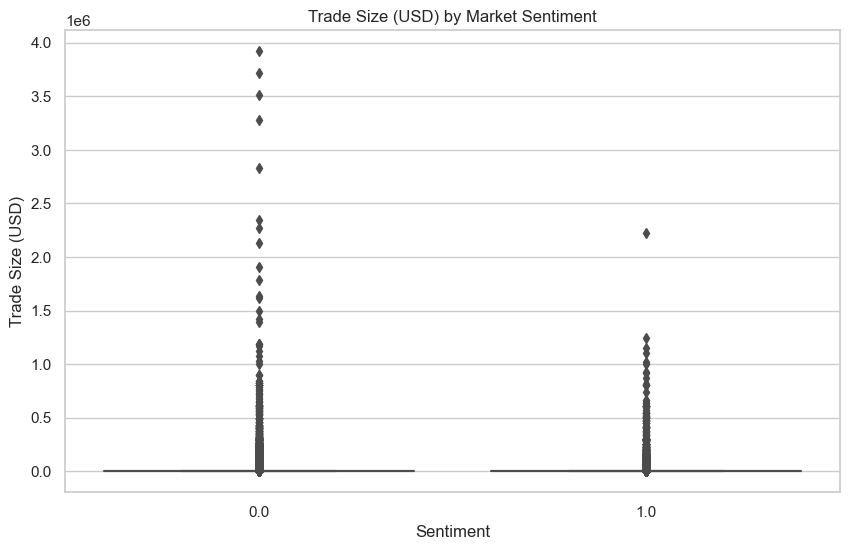

In [12]:
# Trade Size by Sentiment
sns.boxplot(x='sentiment_class', y='size_usd', data=merged_df)
plt.title("Trade Size (USD) by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Trade Size (USD)")
plt.show()

### Uncover Hidden Patterns

C:\Users\yogan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


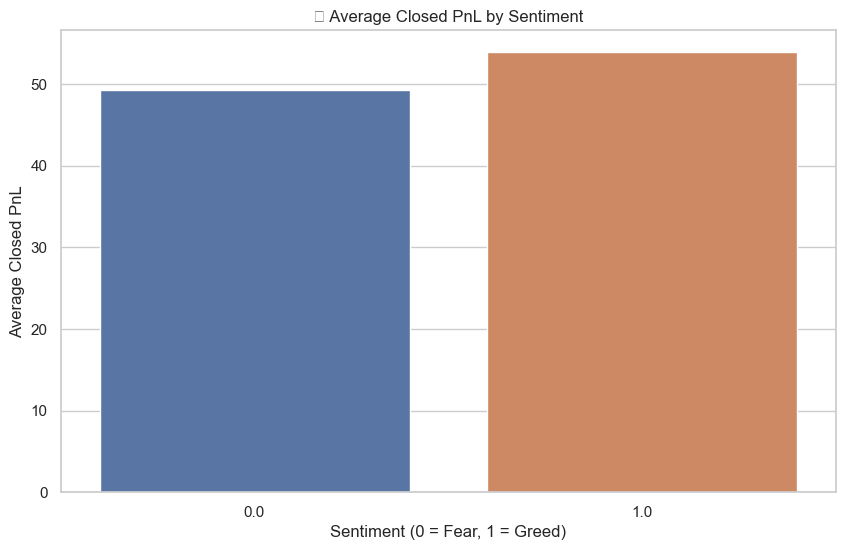

In [15]:
# Pattern 1: Average Closed PnL by Sentiment (Bar plot)
avg_pnl = merged_df.groupby('sentiment_class')['closed_pnl'].mean().reset_index()
sns.barplot(x='sentiment_class', y='closed_pnl', data=avg_pnl)
plt.title("Average Closed PnL by Sentiment")
plt.xlabel("Sentiment (0 = Fear, 1 = Greed)")
plt.ylabel("Average Closed PnL")
plt.show()


C:\Users\yogan\AppData\Local\Temp\ipykernel_18116\745771383.py:5: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  plt.tight_layout()
C:\Users\yogan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


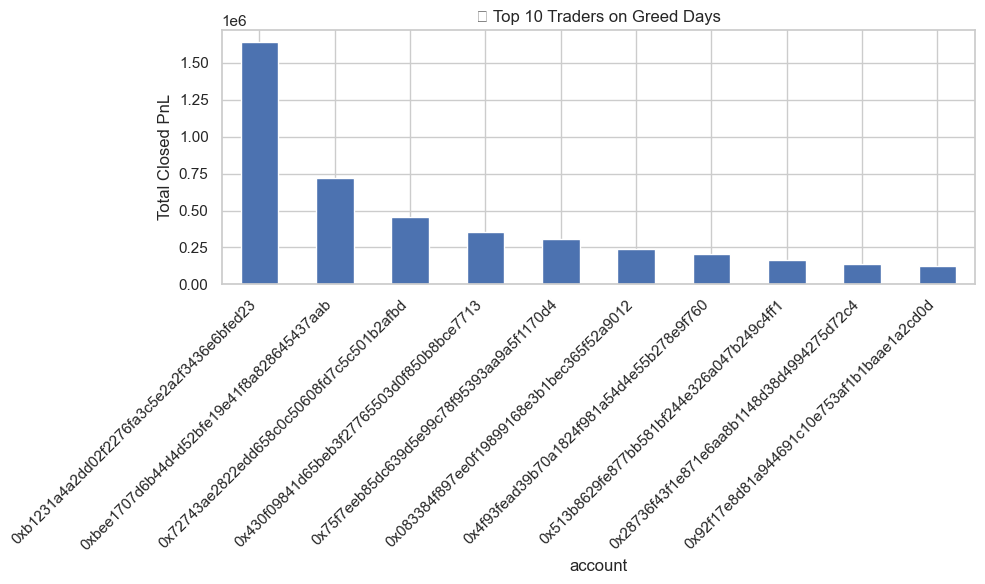

In [16]:
# Pattern 2: Top 10 Traders on Greed Days (Bar plot)
top_greed = merged_df[merged_df['sentiment_class'] == 1].groupby('account')['closed_pnl'].sum().sort_values(ascending=False).head(10)
top_greed.plot(kind='bar', title="Top 10 Traders on Greed Days", ylabel="Total Closed PnL")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\yogan\AppData\Local\Temp\ipykernel_18116\1775319922.py:5: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  plt.tight_layout()
C:\Users\yogan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


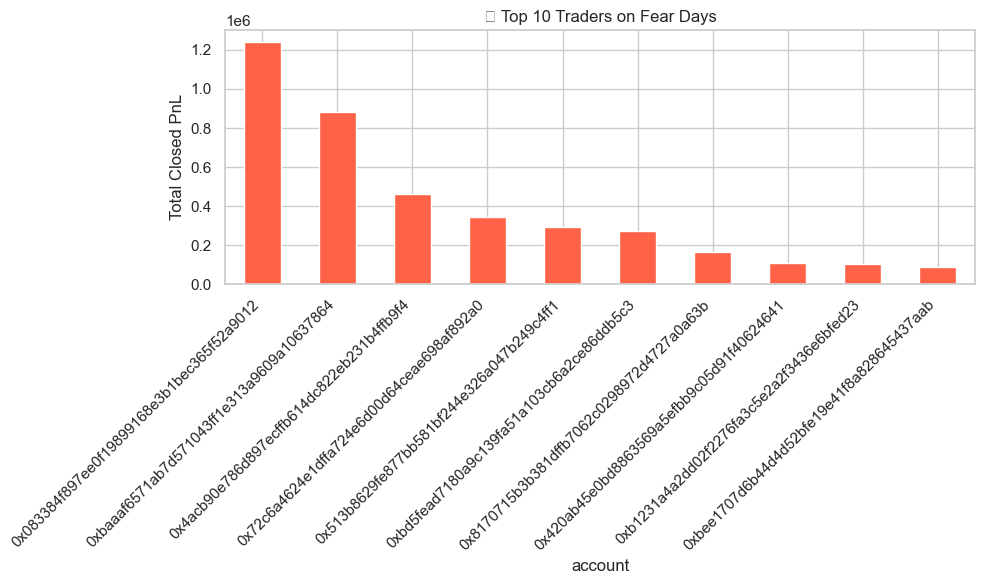

In [17]:
# Pattern 3: Top 10 Traders on Fear Days (Bar plot)
top_fear = merged_df[merged_df['sentiment_class'] == 0].groupby('account')['closed_pnl'].sum().sort_values(ascending=False).head(10)
top_fear.plot(kind='bar', title="Top 10 Traders on Fear Days", ylabel="Total Closed PnL", color='tomato')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\yogan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


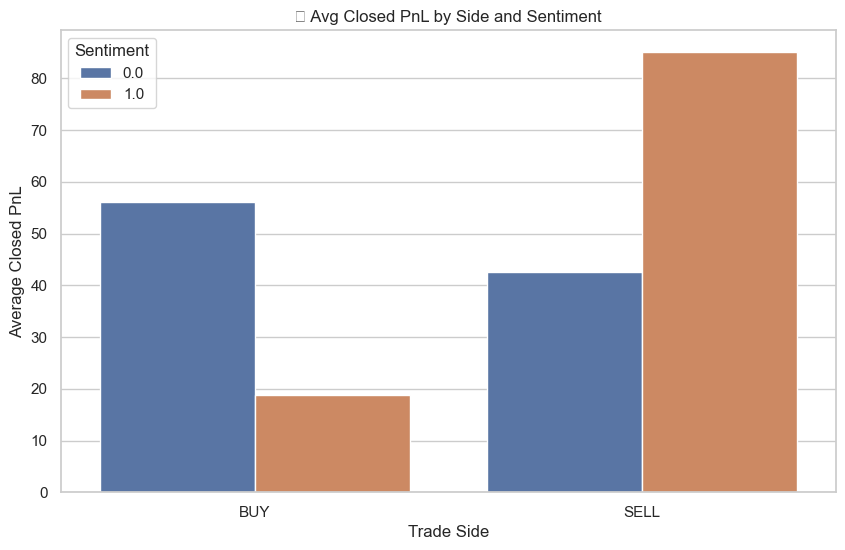

In [22]:
# Pattern 4: Avg PnL by Side and Sentiment (Grouped Bar)
side_sentiment_pnl = merged_df.groupby(['side', 'sentiment_class'])['closed_pnl'].mean().reset_index()
sns.barplot(x='side', y='closed_pnl', hue='sentiment_class', data=side_sentiment_pnl)
plt.title("Avg Closed PnL by Side and Sentiment")
plt.xlabel("Trade Side")
plt.ylabel("Average Closed PnL")
plt.legend(title="Sentiment")
plt.show()

C:\Users\yogan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


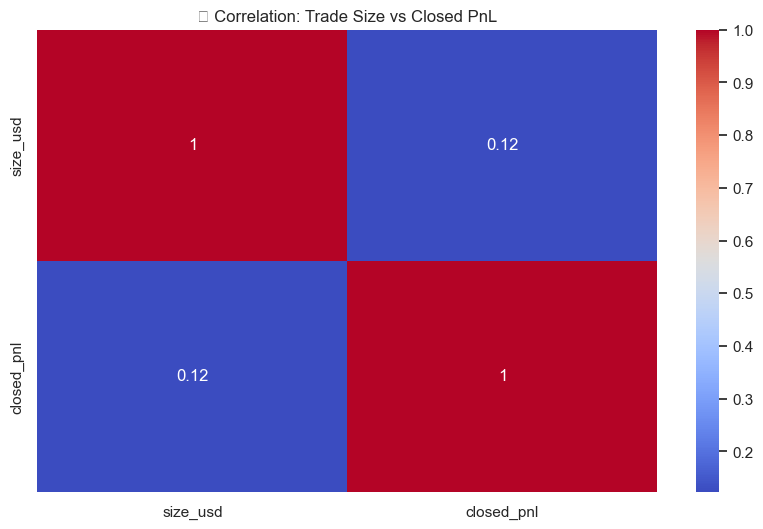

In [26]:
# Pattern 5: Correlation Between Trade Size and PnL (Heatmap)
volume_pnl_corr = merged_df[['size_usd', 'closed_pnl']].corr()
sns.heatmap(volume_pnl_corr, annot=True, cmap='coolwarm')
plt.title("Correlation: Trade Size vs Closed PnL")
plt.show()

C:\Users\yogan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


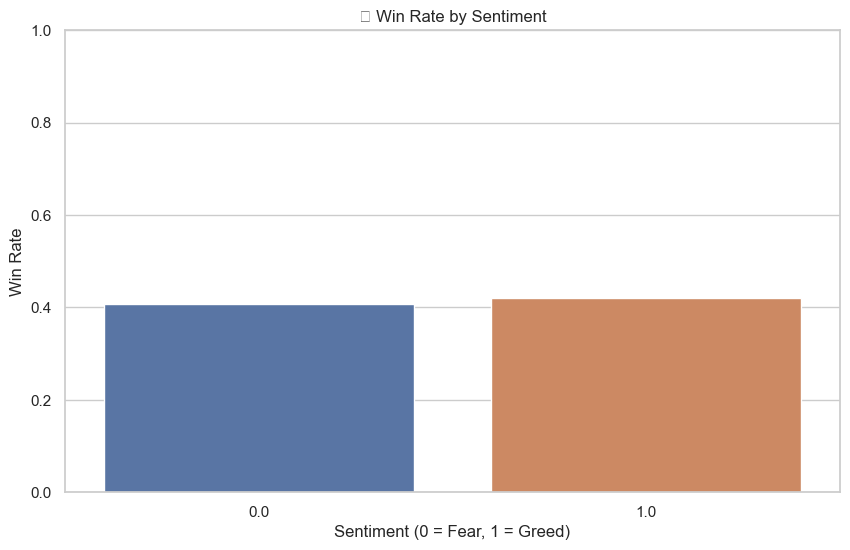

In [30]:
# Pattern 6: Win Rate by Sentiment (Bar plot)
merged_df['is_win'] = merged_df['closed_pnl'] > 0
win_rate = merged_df.groupby('sentiment_class')['is_win'].mean().reset_index()
sns.barplot(x='sentiment_class', y='is_win', data=win_rate)
plt.title("Win Rate by Sentiment")
plt.xlabel("Sentiment (0 = Fear, 1 = Greed)")
plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.show()